# Variability between and within metabolic paths

- Two different organisms: Mycoplasma pneumoniae and Mycoplasma agalactiae, we present how, in quantification by shotgun proteomics, proteins connected in a linear path present similar values. 

- Input:
    - Tab delimited files manually generated: 
             'gene_ide'        'path_number'
    - Protein quantification 
             'gene_ide'        'area'        'log2(area)'
             
- Output:
    - Coefficient of for different paths compared to the expected by chance (calculated 
    
## Requirements

All easily instalable using pip or conda

In [88]:
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns 

## Load data

In [ ]:

def coeff_var(dist):
    """ Given a distribution/array, returns coeff of variation """
    return np.std(dist)/np.mean(dist)*100


def return_metric(genes, quant, n_iter=1000):
    """
    Given a list of genes and quantification information,
    calculates coeff of variation
    
    For an actual set returns observed, expected calculated 
    randomly extracting <n_iter> sets with same length than 
    genes to compute the coeff by chance
    """
    rs = {} 
    genelist = [ide for ide in genes if ide in set(quant.index)]
    ggg = '|'.join(genelist)
    rs[0] = [ggg, [quant.loc[ide]['au'] for ide in genelist], [quant.loc[ide]['logau'] for ide in genelist], 'observed']

    # randomize    
    c=1
    for nnn in range(n_iter):
        s = sample(list(quant.index), len(genelist))
        ggg = '|'.join(s)
        rs[c] = [ggg, [quant.loc[ide]['au'] for ide in s], [quant.loc[ide]['logau'] for ide in s], 'expected']
        c+=1
    # metric
    return {k:[v[0], round(coeff_var(v[1]), 2), round(coeff_var(v[2]), 2), v[3]] for k, v in rs.items()}

def run_analysis(paths, quant):
    """
    Given the input paths and proteomics quantification, 
    Runs Coeff of variation analysis
    """
    
    complexes = ['MPN390', 'MPN391', 'MPN392', 'MPN393',
                 'MAGA7784_RS00520', 'MAGA7784_RS02680', 
                 'MAGA7784_RS00505', 'MAGA7784_RS00515', 
                 'MAGA7784_RS00500']

    # fix complexes + metric
    rs = {}
    for i in set(paths['path']):
        genes = list(paths[paths['path']==i].index)
        print(genes)
        
        if any([g in genes for g in complexes]):
            genes = [g for g in genes if g not in complexes]+['pyrcomp']
        
        # simulate
        if len(rs)==0:
            start = 0
        else:
            start = max(rs.keys())+1
        
        subrs = return_metric(genes, quant)
        subrs = {k+start:v+[i] for k, v in subrs.items()}
        rs.update(subrs)
    
    df = pd.DataFrame.from_dict(rs, orient='index')
    df.columns = ['genes', 'raw CV', 'log(CV)', 'type', 'path']
    
    return df

## Load path info (available in './data/')


In [95]:
# Path info
mpneupath = pd.read_csv('./data/mpneumoniae_paths.txt', index_col='ide')
magalpath = pd.read_csv('./data/magalactiae_paths.txt', index_col='ide')

mpneupath.head(5) # first 5 cases

,path
ide,
MPN667,1
MPN257,1
MPN350,2
MPN546,2
MPN299,2


In [100]:
# Load quantification info (available in data):
mpneuquant = pd.read_csv('./data/mpneumoniae_quant.txt', sep='\t', index_col='ide')
magalquant = pd.read_csv('./data/magalactiae_quant.txt', sep='\t', index_col='ide')

mpneuquant.head(10)

,au,logau
ide,,
MPN674,427925000.0,28.672783
MPN533,949950000.0,29.823276
MPN564,5048000.0,22.267280
MPN066,191700000.0,27.514275
MPN268,88250000.0,26.395093
MPN062,517400000.0,28.946705
MPN303,409600000.0,28.609640
MPN473,10279500.0,23.293267
MPN017,17545000.0,24.064557


## Run Coeff of Variation analysis

In [81]:
mpneucvs = run_analysis(mpneupath, mpneuquant)
magalcvs = run_analysis(mpneupath, mpneuquant)

['MPN667', 'MPN257']
['MPN350', 'MPN546', 'MPN299', 'MPN637', 'MPN253']
['MPN302', 'MPN250']
['MPN430', 'MPN303', 'MPN606', 'MPN429', 'MPN628']
['MPN394', 'MPN390', 'MPN391', 'MPN392', 'MPN393']
['MPN533', 'MPN428']
['MPN493', 'MPN495', 'MPN494', 'MPN498', 'MPN496', 'MPN492', 'MPN497']
['MPN595', 'MPN251']
['MPN667', 'MPN257']
['MPN350', 'MPN546', 'MPN299', 'MPN637', 'MPN253']
['MPN302', 'MPN250']
['MPN430', 'MPN303', 'MPN606', 'MPN429', 'MPN628']
['MPN394', 'MPN390', 'MPN391', 'MPN392', 'MPN393']
['MPN533', 'MPN428']
['MPN493', 'MPN495', 'MPN494', 'MPN498', 'MPN496', 'MPN492', 'MPN497']
['MPN595', 'MPN251']


In [82]:
mpneucvs.head(10) # observed is the actual sample, expected are results of randomization

,genes,raw CV,log(CV),type,path
0,MPN667|MPN257,20.64,1.17,observed,1
1,MPN445|MPN218,40.29,2.33,expected,1
2,MPN395|MPN250,56.18,3.26,expected,1
3,MPN043|MPN603,91.89,9.37,expected,1
4,MPN597|MPN322,78.25,5.57,expected,1
5,MPN493|MPN066,79.27,5.99,expected,1
6,MPN667|MPN240,51.10,3.09,expected,1
7,MPN236|MPN321,13.46,0.70,expected,1
8,MPN627|MPN064,21.90,1.15,expected,1
9,MPN445|MPN601,8.12,0.46,expected,1


## Boxplots

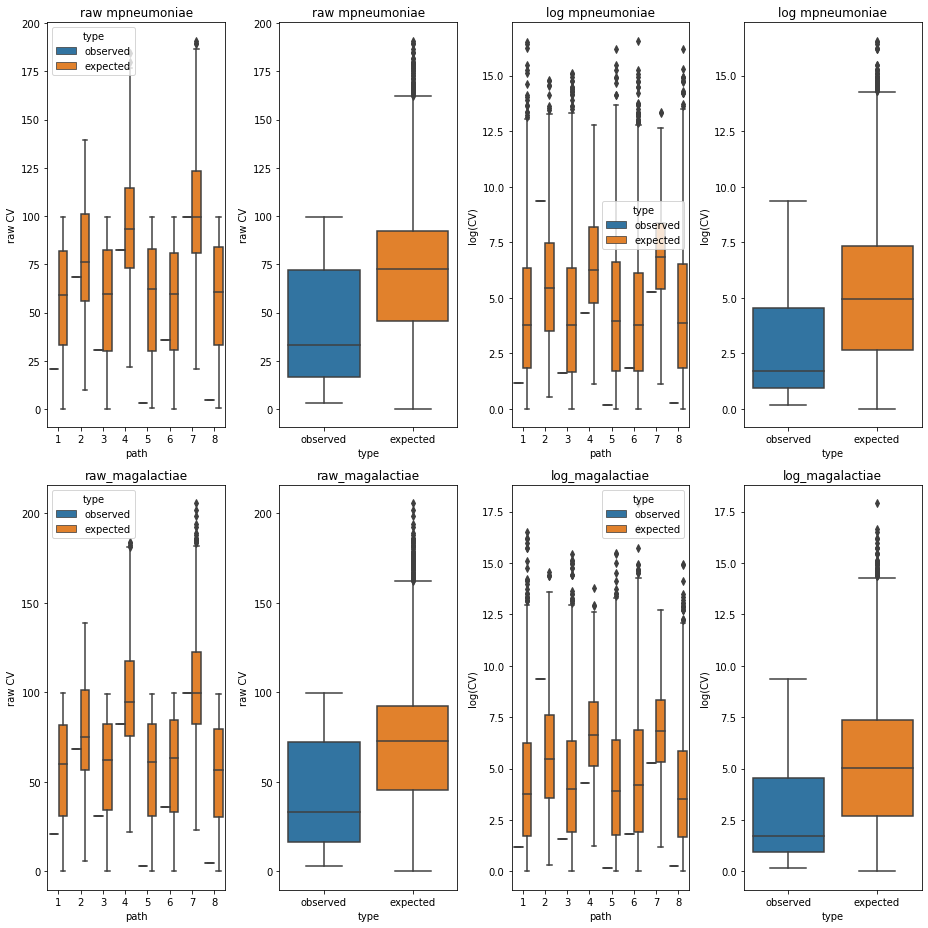

In [89]:
plt.figure(figsize=(13,13))
plt.subplot(2,4,1)

sns.boxplot(y='raw CV', x='path', hue='type', data=mpneucvs)
plt.title('raw mpneumoniae')
plt.subplot(2,4,2)
sns.boxplot(y='raw CV', x='type', data=mpneucvs)
plt.title('raw mpneumoniae')
plt.subplot(2,4,3)
sns.boxplot(y='log(CV)', x='path', hue='type', data=mpneucvs)
plt.title('log mpneumoniae')
plt.subplot(2,4,4)
sns.boxplot(y='log(CV)', x='type', data=mpneucvs)
plt.title('log mpneumoniae')

plt.subplot(2,4,5)
sns.boxplot(y='raw CV', x='path', hue='type', data=magalcvs)
plt.title('raw_magalactiae')
plt.subplot(2,4,6)
sns.boxplot(y='raw CV', x='type', data=magalcvs)
plt.title('raw_magalactiae')
plt.subplot(2,4,7)
sns.boxplot(y='log(CV)', x='path', hue='type', data=magalcvs)
plt.title('log_magalactiae')
plt.subplot(2,4,8)
sns.boxplot(y='log(CV)', x='type', data=magalcvs)
plt.title('log_magalactiae')

plt.tight_layout()